# Master BigData UCM 2023

## 1. Datos vehículos a la venta 2016 en UK

Propósito:

- Facilitar la lectura del .csv que contiene los datos de este ejemplo



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine
from plotnine import *

¿Es necesario el código siguiente (que veréis en muchos notebooks publicados)?

La respuesta es no, no es necesario.

https://stackoverflow.com/questions/65934740/is-matplotlib-inline-still-needed

### Carga de datos

Este dataset tiene ya 7 años pero sigue siendo válido para nuestro propósito. 

La principal ventaja es que tiene una variale de grupo (o "factor") creada en español (la variable "Tipo") para facilitar los gráficos por tipo de vehículo.

In [2]:
df= pd.read_pickle("datos_vehiculos_2016.pkl")

In [3]:
df.shape

(4490, 20)

In [4]:
df.describe(include = 'all')

,Manufacturer,Model,EngineCapacity,FuelType,MetricUrbanCold,MetricExtraUrban,MetricCombined,ImperialUrbanCold,ImperialExtraUrban,ImperialCombined,CO2gkm,FuelCost12000Miles,EuroStandard,NoiseLeveldBA,EmissionsCOmgkm,THCEmissionsmgkm,EmissionsNOxmgkm,THC+NOxEmissionsmgkm,ParticulatesNo_mgkm,Tipo
count,4490,4490,4490.000000,4490,4459.000000,4459.000000,4490.000000,4459.000000,4459.000000,4490.000000,4490.000000,4490.000000,4490.0,4490.000000,4490.000000,2230.000000,4490.000000,2289.000000,2293.000000,4490
unique,44,450,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,BMW,Coupe,NaN,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel
freq,607,260,NaN,2274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2274
mean,NaN,NaN,1991.111804,NaN,6.925252,4.790491,5.549042,45.364230,62.014891,55.120445,135.823163,1086.980401,6.0,71.302249,260.113007,41.636726,37.138886,80.458934,0.300039,NaN
std,NaN,NaN,828.057573,NaN,2.800404,1.224893,1.794549,12.962089,12.771535,15.869631,39.732306,348.519954,0.0,1.969812,143.096498,14.819350,18.805169,22.962894,0.331194,NaN
min,NaN,NaN,647.000000,NaN,0.000000,0.000000,0.600000,0.000000,0.000000,17.300000,13.000000,117.000000,6.0,66.000000,10.000000,4.000000,1.000000,19.000000,0.000000,NaN
25%,NaN,NaN,1499.000000,NaN,5.200000,4.000000,4.400000,36.700000,53.300000,46.300000,112.000000,867.000000,6.0,70.000000,156.000000,33.000000,23.000000,66.000000,0.060000,NaN
50%,NaN,NaN,1968.000000,NaN,6.100000,4.500000,5.100000,46.300000,62.800000,55.400000,127.000000,999.500000,6.0,71.000000,230.000000,41.000000,36.000000,81.000000,0.180000,NaN
75%,NaN,NaN,1997.000000,NaN,7.700000,5.300000,6.100000,54.300000,70.600000,64.200000,149.000000,1202.000000,6.0,73.000000,329.000000,49.000000,52.000000,97.000000,0.480000,NaN


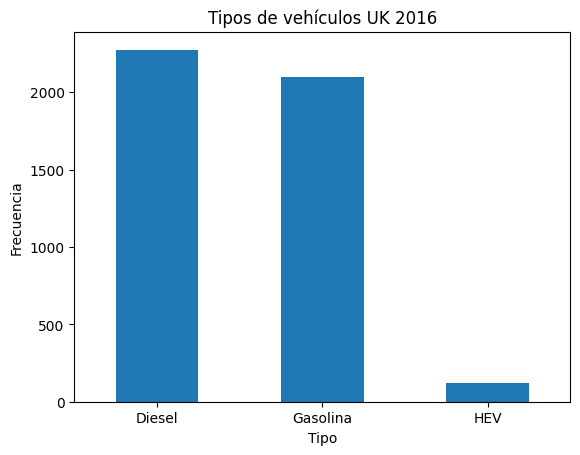

In [5]:
count_classes = pd.value_counts(df['Tipo'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Tipos de vehículos UK 2016")
plt.xlabel("Tipo")
plt.ylabel("Frecuencia");

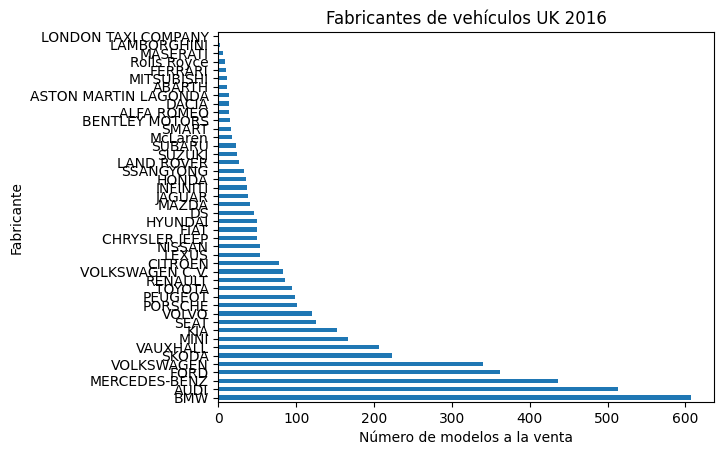

In [6]:
count_classes = pd.value_counts(df['Manufacturer'], sort = True)
count_classes.plot(kind = 'barh')
plt.title("Fabricantes de vehículos UK 2016")
plt.xlabel("Número de modelos a la venta")
plt.ylabel("Fabricante");

In [ ]:
df.head()

In [7]:
para_treemap = df[["Manufacturer", 
                   "Tipo"]].value_counts()

In [8]:
para_treemap

Manufacturer         Tipo    
BMW                  Diesel      333
AUDI                 Diesel      298
BMW                  Gasolina    261
FORD                 Diesel      216
MERCEDES-BENZ        Diesel      214
                                ... 
MASERATI             Diesel        2
DS                   HEV           1
LONDON TAXI COMPANY  Diesel        1
MITSUBISHI           HEV           1
LAND ROVER           HEV           1
Length: 90, dtype: int64

In [9]:
para_tree2 = para_treemap.reset_index(name = "count")

In [ ]:
para_treemap.dtypes

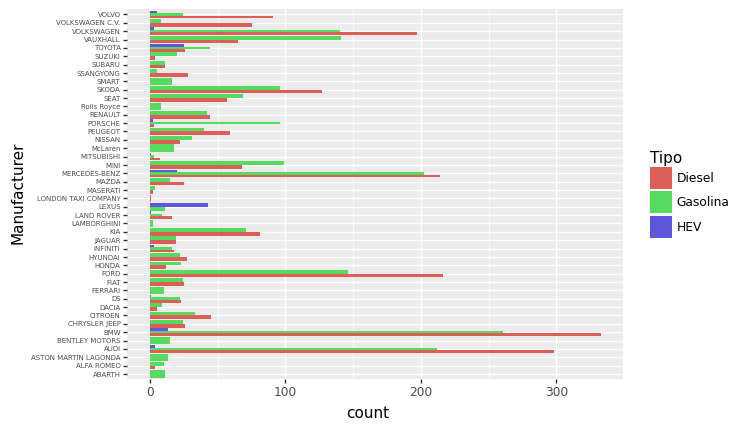

<ggplot: (8741217185513)>

In [20]:
( ggplot(data = para_tree2)
 + aes(x = "Manufacturer",
      y = "count",
      fill = 'Tipo')
 + geom_bar(stat = "identity",
            position = 'dodge')
 + coord_flip()
 + theme(axis_text_y = element_text(size = 5))
)

In [21]:
( ggplot(data = para_tree2)
 + aes(x = "Manufacturer",
       area = "count",
       fill = 'Tipo')
 + geom_treemap()
)

NameError: name 'geom_treemap' is not defined